## Latent Semantic Analysis (LSA)

The LSA is a dimension reduction technique that can be used to uncover common topics in a corpus of text documents.


In [1]:
import pandas as pd
import numpy as np
import re
import nltk

nltk.download('reuters')

from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

[nltk_data] Downloading package reuters to /home/amarov/nltk_data...


In [2]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [3]:
housing_fileids = reuters.fileids(["housing"])
income_fileids = reuters.fileids(["income"])
heating_fileids = reuters.fileids(["heat"])

housing_text = reuters.raw(fileids=housing_fileids).split("\n\n")
income_text = reuters.raw(fileids=income_fileids).split("\n\n")
heating_text = reuters.raw(fileids=heating_fileids).split("\n\n")

texts = housing_text + income_text + heating_text
topics = ["housing"] * len(housing_text) + ["income"] * len(income_text) + ["heating"] * len(heating_text)

len(texts)

67

In [4]:
texts[1]

'INTEREST RATES HURT U.S. MAY HOUSING SALES\n  Sales of new single-family homes\n  tumbled 14.9 pct in May from April levels because of higher\n  mortgage interest rates, analysts said.\n      "There should be another month or two of very weak new home\n  sales but with interest rates stabilizing, sale of new homes\n  should become more stable by mid-summer," said economist\n  Lawrence Chimerine of Wharton Econometrics Inc.\n      The drop in May, to a seasonally adjusted annual rate of\n  616,000 units, was the largest since January 1982, the Commerce\n  Department said.\n      Interest rates on conventional mortgages bottomed out at\n  about 9.08 pct in March and rose to about 10.7 pct in April,\n  according to Stephen Roach, economist at Morgan Stanley.\n      The effect was to freeze some potential new homebuyers out\n  of the market, he and others said.\n      "The rates moved very suddenly and were certainly\n  unexpected by homebuyers," said Cynthia Latta, an economist\n  with D

In [5]:
# We will remove the numbers from the text, because here these are very common in every article and obfuscate
# the results

texts = [re.sub("\d+", "", text) for text in texts]

from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=0.05
)
term_doc_matrix = tfidf.fit_transform(texts)

term_doc_df = pd.DataFrame(
    term_doc_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

## Should probably remove numbers
term_doc_df.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_25346/761169982.py:4: SyntaxWarning: invalid escape sequence '\d'
  texts = [re.sub("\d+", "", text) for text in texts]


,according,added,adjusted,ago,analysts,annual,april,area,average,bank,...,unchanged,underlying,unit,united,units,wage,week,year,years,york
0,0.056346,0.051617,0.000000,0.0,0.000000,0.041284,0.041284,0.0,0.080446,0.215250,...,0.000000,0.00000,0.000000,0.059343,0.040223,0.0,0.0,0.365551,0.059343,0.000000
1,0.058931,0.000000,0.037393,0.0,0.058931,0.043178,0.086356,0.0,0.000000,0.056281,...,0.000000,0.05196,0.000000,0.000000,0.042068,0.0,0.0,0.000000,0.000000,0.044364
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.219761,0.0,0.000000,0.042293,0.000000,0.0,0.000000,0.000000,...,0.044703,0.00000,0.043455,0.000000,0.453269,0.0,0.0,0.000000,0.000000,0.000000


In [6]:
term_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 202 entries, according to york
dtypes: float64(202)
memory usage: 105.9 KB


$$
A_{m\times n} = \mathbf{U}_{m \times m} \mathbf{\Sigma}_{m \times n} \mathbf{V}^T_{n \times n}
$$
Where $\mathbb{U}$ and $\mathbb{V}$ are orthogonal matrices.

$$
\mathbf{A} = \begin{pmatrix}
u_{11} & u_{12} & \cdots & u_{1m} \\
u_{21} & u_{22} & \cdots & u_{2m} \\
\vdots \\
u_{m1} & u_{m2} & \cdots & u_{mm} \\
\end{pmatrix}
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0\\
0 & \sigma_2 & \cdots & 0 & 0\\
0 & 0 & \ddots & \sigma_k & \vdots \\
0 & 0 & \cdots & 0 & \mathbf{0}_{n - k \times m - k}
\end{pmatrix}

\begin{pmatrix}
v_{11} & v_{12} & \cdots & v_{1n} \\
v_{21} & v_{22} & \cdots & v_{2n} \\
\vdots \\
v_{n1} & v_{m2} & \cdots & v_{nn} \\
\end{pmatrix}^T
$$

$$
\begin{align}
\mathbf{A} & = \begin{pmatrix}
u_{11} \\
u_{21} \\
\vdots\\
u_{m1}
\end{pmatrix}
\times \sigma_1 \times 
\begin{pmatrix}
v_{11} & v_{12} & \ldots & v_{1n}
\end{pmatrix} +  \\

& \begin{pmatrix}
u_{12} \\
u_{22} \\
\vdots\\
u_{m2}
\end{pmatrix}
\times \sigma_2 \times 
\begin{pmatrix}
v_{21} & v_{22} & \ldots & v_{2n}
\end{pmatrix} + \\
& \vdots \\
\end{align}
$$

You can think about matrix multiplication as a sum of outer products

$$
\begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
= \begin{pmatrix}
0a & 0b \\
2a & 2b
\end{pmatrix}
+ 
\begin{pmatrix}
1c & 1d \\
3c & 3d
\end{pmatrix} = 
\begin{pmatrix}
0a + 1c & 0b + 1d \\
2a + 3c & 2b + 3d
\end{pmatrix}
$$

Using this you can write the singular value decomposition as a sum of outer products.

$$
\mathbf{A} = \sum_{i} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$

While the outer products represent directions, you can think about the singular values as describing the _importance_ of these directions.

Some of the terms in the sum contribute less to A, so dropping these from the sum results in a lower-rank (p) approximation of the matrix.

$$
\mathbf{A} \approx \sum_{i = 1}^{p} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$




Example document-term matrix:

| Documents/Terms | house | oil  | wage |
|-----------------|-------|------|------|
| Doc1 (housing)  | 1.43  | 0.02 | 0.3  |
| Doc2 (income)   | 0.4   | 0.01 | 1.2  |
| Doc3 (heat)     | 0.35  | 1.7  | 0.04 |

Example terms-topic matrix: values indicate how strongly a word is related to a topic.

| Word/Topic | housing | income | heat |
|------------|---------|--------|------|
| house      | 1.43    | 0.022  | 0.34 |
| wage       | 0.14    | 2.01   | 0.25 |
| oil        | 0.35    | 0.21   | 1.12 |

Example document-topic matrix: the values in this matrix indicate how strongly
a document is related to a topic.

| Document/Topic | housing | income | heat |
|----------------|---------|--------|------|
| Doc1 (housing) | 1.43    | 0.01   | 0.21 |
| Doc2 (income)  | 0.14    | 2      | 0.25 |
| Doc3 (heat)    | 0.38    | 0.21   | 1.17 |


The singular values indicate how strongly a topic contributes to explaining
the data (term-document frequencies).

| Topic   | singular value |
|---------|----------------|
| housing | 6.2            |
| wage    | 2.3            |
| oil     | 0.02           |


In [7]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=30, n_iter=100, random_state=42)
lsa_result = lsa.fit_transform(term_doc_df)
Sigma = lsa.singular_values_
V_T = lsa.components_.T
V_T

array([[ 0.01101562,  0.02439823, -0.00161363, ..., -0.02487008,
        -0.01906654, -0.01775292],
       [ 0.01683061,  0.00145462, -0.016919  , ..., -0.01384861,
        -0.01824396,  0.02444552],
       [ 0.10548801, -0.02915534,  0.11419569, ..., -0.04158702,
        -0.1313619 ,  0.00392041],
       ...,
       [ 0.15972607, -0.02640216, -0.08136184, ...,  0.0724007 ,
         0.17677594,  0.05606418],
       [ 0.01335311,  0.0091913 , -0.00876963, ...,  0.01770479,
        -0.03152487,  0.02959704],
       [ 0.02667957,  0.14944649,  0.00880958, ..., -0.07018896,
        -0.04003199,  0.00985056]])

<Axes: >

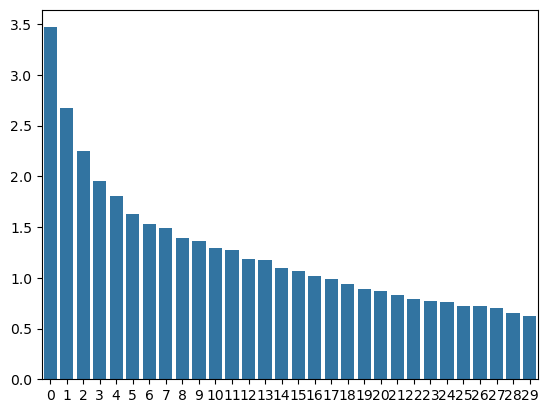

In [8]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [9]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=term_doc_df.columns,
                                 columns = [f'Component {r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29
according,0.011016,0.024398,-0.001614,0.008535,-0.009180,0.028410,-0.009367,-0.028593,0.054321,-0.014011,...,0.123077,-0.059647,0.081321,0.108827,0.103682,-0.026132,0.086406,-0.024870,-0.019067,-0.017753
added,0.016831,0.001455,-0.016919,0.007546,-0.023014,0.021992,-0.031480,-0.037103,0.012437,0.009522,...,0.023162,0.057442,0.014347,0.003134,-0.028848,-0.017090,0.015291,-0.013849,-0.018244,0.024446
adjusted,0.105488,-0.029155,0.114196,-0.037458,-0.085096,-0.045588,-0.041630,0.044755,-0.014731,0.025389,...,-0.058722,0.041000,0.035087,0.080478,0.063575,0.015637,-0.001009,-0.041587,-0.131362,0.003920
ago,0.020690,0.001509,-0.013194,-0.003925,-0.023187,0.004307,0.003622,-0.001829,-0.006370,0.032890,...,0.013501,-0.022060,-0.052997,-0.007442,-0.023022,-0.016295,0.082894,0.009509,-0.009192,0.004566
analysts,0.019367,0.014118,-0.002075,0.000837,-0.027660,0.063290,-0.004396,-0.054687,0.091456,0.008507,...,0.201333,0.142167,0.037377,-0.102600,0.129020,0.025406,0.007310,-0.046779,0.032218,-0.038021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wage,0.036213,-0.006499,-0.067636,-0.088962,-0.006264,-0.016005,0.026172,-0.031241,0.005113,-0.148983,...,-0.029038,0.127954,0.038232,0.062789,-0.034565,0.022911,-0.008388,-0.062696,0.027726,-0.008366
week,0.025413,0.038685,-0.000160,0.006536,-0.026049,0.071830,0.000728,-0.054469,0.106938,0.012066,...,0.179050,0.076547,-0.021056,-0.100622,0.181238,-0.013838,0.003907,0.020974,0.020679,0.010763
year,0.159726,-0.026402,-0.081362,-0.043734,-0.063589,0.136046,-0.332106,-0.184065,-0.107725,0.026610,...,0.034884,-0.083444,0.118945,-0.062420,0.042034,0.088592,-0.084694,0.072401,0.176776,0.056064
years,0.013353,0.009191,-0.008770,0.021923,-0.000794,0.020382,-0.033321,-0.003943,-0.024872,-0.014972,...,-0.010101,0.054964,-0.093024,-0.053463,0.011144,0.012792,0.187997,0.017705,-0.031525,0.029597


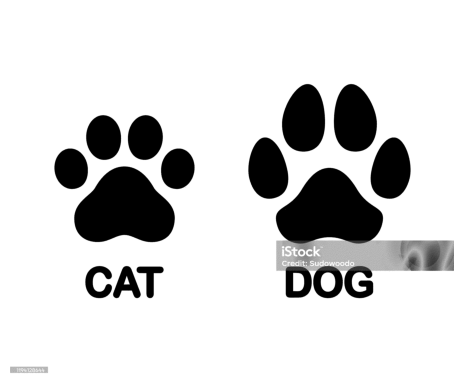

In [14]:
from PIL import Image

import matplotlib.pyplot as plt

# Load the WebP image as black and white

image_path = '../figures/istockphoto-1194128644-2048x2048.webp'
image = Image.open(image_path).convert('1')

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

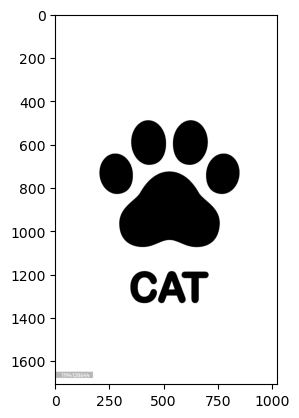

In [15]:
# Select the left half of the image

left_half = image.crop((0, 0, image.width // 2, image.height))
plt.imshow(left_half)

In [ ]:
# import pandas as pd

# image_left = np.array(left_half)
# df = pd.DataFrame(image_left)

# df_l = df.stack().reset_index()
# df_black = df_l[df_l[0] == False].sample(1000)
# df_black.columns = ['x', 'y', 'black']
# df_black["z"] = np.reandom.randn(len(df_black))

# plt.plot(df_black['x'], df_black['y'], 'o', color='black')


AttributeError: module 'numpy' has no attribute 'reandom'